## VARIABLE SELECTION ON A LOAN DATASET

This analysis involves a *Personal_Loans Dataset* which contains **4846 Data Records of Bank Customers**. The data includes basic information of each customer as well as whether the customer took out a loan and the size of that loan.

## Introduction

**These Factors involved** are the *Variables of the dataset*. The **quality of the variables** present within this dataset has a direct impact on the outcome of the **Loan Size** a person takes. 

We will first select the relevant factors that influence Size of a Loan,

Then,

We will use regression techniques to build the associations between these chosen variables. 

> This Variable selection will involve the **elimination of some factors** which may, in turn, reduce the computational cost of modelling and, improve the performance of this model. 

### Import dataset and libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

We will be using the `personal_loans` dataset which contains data of **bank customers**. The data include basic information of each customer as well as whether the customer took out a loan and the size of that loan.

The basic information consists of:
* **Age** – the customer's age in years. 
* **Experience** – working experience in years.
* **Income** – annual income expressed in multiples of 1000.
* **Family** – members in the family, including the customer self.
* **CCAvg** – average monthly spend on credit card.
* **Education** – undergrad/postgrad/professional.
* **Mortgage** – amount expressed in multiples of 1000.
* **Securities Account** – whether the customer has a securities account.
* **CD Account** – whether the customer has a cash deposit account.
* **Online** – whether the customer is using online banking.
* **Gender** – male/female.
* **Area** – geographic area where the customer lives. 
* **Personal Loan** – whether the person took out a personal loan.
* **Loan Size** – amount expressed in multiples of  1000.

We will **load our data** as a Pandas DataFrame:

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/bootcamps/Personal_Loans.csv')
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,Gender,Area,Personal Loan,Loan Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35


In [100]:
df.shape   #4846 records originally, with 14 features

(4846, 14)

### Pre-processing

With our data loaded, we now consider doing some preliminary data preprocessing. 

Some of the **columns have white space** that we want to replace with an underscore (to avoid using the column names as variable names later on).

In [101]:
#data cleaning 
df.columns = [col.replace(" ","_") for col in df.columns] 
df.head()   

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Personal_Loan,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35


To build some relationship between variables that are likely to indicate the loan amount once someone has taken a loan, we only **consider customers who actually took a personal loan** to build this relationship: (whose Personal loan column == 1)

In [102]:
df = df[df['Personal_Loan'] == 1]
df = df.drop(['Personal_Loan'],axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,35


In [103]:
df.shape  #471 out of 4876 records for those who actually took out loans

(471, 13)

## 1. Variable types and summary statistics

>The data types and the summary statistics of our variables.

The Variables involved in our dataset may generally be grouped into the following types as seen in the image* below:

> You can copy the image URL below into a new tab to get the full-size version to download

In [104]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://raw.githubusercontent.com/Explore-AI/Pictures/master/Variable_data_types.jpg')

Let's look at the **data types and number of entries** of each column in our dataset:

In [105]:
df.info()   #investigation of non-null and non-numeric values in each column

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 470
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 471 non-null    int64  
 1   Experience          471 non-null    int64  
 2   Income              471 non-null    int64  
 3   Family              471 non-null    int64  
 4   CCAvg               471 non-null    float64
 5   Education           471 non-null    object 
 6   Mortgage            471 non-null    int64  
 7   Securities_Account  471 non-null    int64  
 8   CD_Account          471 non-null    int64  
 9   Online              471 non-null    int64  
 10  Gender              471 non-null    object 
 11  Area                471 non-null    object 
 12  Loan_Size           471 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 51.5+ KB


>  `df.info()` outputs the number of non-null entries in each column. As such, we can be certain that our data have missing values if columns have a varying number of non-null entries.  

Now let's look at a table showcasing the **summary statistics** of the data.

In [106]:
df.describe().T  #summary statistics of each NUMERICAL (column) in the data

,count,mean,std,min,25%,50%,75%,max
Age,471.0,45.205945,11.626366,26.0,35.0,45.0,55.00,65.0
Experience,471.0,19.991507,11.589427,0.0,9.0,20.0,30.00,41.0
Income,471.0,144.811040,31.761417,60.0,122.0,143.0,172.00,203.0
Family,471.0,2.609342,1.112902,1.0,2.0,3.0,4.00,4.0
CCAvg,471.0,3.901274,2.098956,0.0,2.6,3.8,5.35,10.0
Mortgage,471.0,101.598726,161.389361,0.0,0.0,0.0,193.00,617.0
Securities_Account,471.0,0.125265,0.331372,0.0,0.0,0.0,0.00,1.0
CD_Account,471.0,0.286624,0.452665,0.0,0.0,0.0,1.00,1.0
Online,471.0,0.607219,0.488888,0.0,0.0,1.0,1.00,1.0
Loan_Size,471.0,33.231423,9.759205,9.0,26.0,32.0,41.00,50.0


From the results above, we notice that there exists Categorical Columns that need to be converted to Numerical data type:
> Education
> Gender
> Area

We therefore use **Dummy Variable Encoding Process** to convert them to *Binary Categorical Variables*

## 2. Dummy variable encoding

As observed in the above table, we get little information from the summary statistics of our numerical categorical data (`Online`, `CD_Account`, `Securities_Account`).

More importantly, **all input data for regression model** building purposes **need to be numerical**. 

We, therefore, have to **transform the text data** (found within columns such as `Education`, `Gender`, and `Area`) **into numbers** before we can consider them in our features under analysis for Variable Selection. 

>We **use a Pandas method** called `get_dummies`. 

`get_dummies` will transform all the categorical text data into numbers by adding a **column for each distinct category**. The new column has:
- `1` for observations that **were** in this category.
- `0` for observations that **were** not in this category.

For example, the DataFrame:

| Dog Age | Breed      |
|---------|------------|
| 15      | "Bulldog"  |
| 12      | "Labrador" |
| 10      | "Labrador" |
| 22      | "Beagle"   |
| 9       | "Labrador" |


After `pd.dummies` becomes:

| Dog Age | Breed_Labrador | Breed_Bulldog | Breed_Beagle |
|---------|----------------|---------------|--------------|
| 15      | 1              | 0             | 0            |
| 12      | 0              | 1             | 0            |
| 10      | 1              | 0             | 0            |
| 22      | 0              | 0             | 1            |
| 9       | 1              | 0             | 0            |


In [119]:
# Dummy variable encoding our dataset

df_dummies = pd.get_dummies(df)

# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size,...,Area_San_Mateo,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
0,26,2,60,2,3.0,132,0,0,0,15,...,False,False,False,False,False,False,False,False,False,False
1,26,0,83,3,3.9,0,0,0,1,30,...,False,False,False,False,False,False,False,False,True,False
2,26,0,129,3,0.7,0,0,0,0,33,...,False,False,False,False,False,False,False,False,False,False
3,26,0,132,3,6.5,0,0,0,0,40,...,False,False,False,False,False,False,False,False,False,False
4,26,2,132,2,2.4,0,0,0,0,35,...,False,False,False,False,False,False,False,False,False,False


In [120]:
df_dummies.shape

(471, 44)

Suddenly we have many more variable columns – our **original 13 variable columns** are **now 44** given the dummy variable encoding. 

## 3. Correlations and model structure

Using the dummy variable DataFrame, I built a model that predicts `Loan_Size` (our dependent variable) as a function of **44 different independent variables**.

First, I **reorder columns** so that our dependent variable is the last column of the DataFrame: 

In [122]:
#Reordering columns:
column_titles = [col for col in df_dummies.columns if col!= 'Loan_Size'] + ['Loan_Size']
df_dummies=df_dummies.reindex(columns=column_titles)

### Create and visualise the correlation matrix

This makes a **heatmap visualisation** representing a **correlation matrix** of our data easier to interpret:

In [123]:
# The correlation matrix
df_dummies.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Postgrad,...,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo,Loan_Size
Age,1.000000,0.994515,0.015225,-0.000511,-0.001101,0.032283,-0.024383,0.058700,0.032229,-0.029279,...,-0.013636,0.018168,-0.003689,0.056028,-0.008313,-0.006905,-0.064364,-0.002742,0.020305,-0.130709
Experience,0.994515,1.000000,0.009290,0.008815,-0.016679,0.027737,-0.020221,0.064950,0.034709,-0.026661,...,-0.016887,0.008422,0.000090,0.059995,-0.009162,-0.008093,-0.063715,0.000113,0.025643,-0.131946
Income,0.015225,0.009290,1.000000,-0.024424,0.225125,0.185415,-0.046466,0.076141,0.074409,0.027000,...,0.011555,0.058393,-0.020837,0.075340,-0.067657,-0.008274,0.054066,-0.015916,-0.016307,0.522566
Family,-0.000511,0.008815,-0.024424,1.000000,0.007318,0.065640,-0.097798,-0.001103,-0.036258,-0.037272,...,-0.021532,-0.102810,-0.004189,0.028135,0.052141,0.022887,-0.066773,-0.059468,0.016631,0.097280
CCAvg,-0.001101,-0.016679,0.225125,0.007318,1.000000,0.026942,0.021183,0.036788,-0.019209,0.033567,...,-0.015515,-0.025163,0.009131,0.138691,0.005043,0.062233,-0.004428,0.097795,0.017944,0.420913
Mortgage,0.032283,0.027737,0.185415,0.065640,0.026942,1.000000,-0.026032,0.091658,0.076362,-0.055804,...,0.107640,-0.023643,-0.023965,0.078169,-0.050456,0.048195,-0.029069,-0.036239,0.068001,-0.496354
Securities_Account,-0.024383,-0.020221,-0.046466,-0.097798,0.021183,-0.026032,1.000000,0.469349,0.054820,-0.003932,...,0.026419,-0.002559,-0.046480,0.050326,0.050326,0.128594,-0.017455,-0.016050,-0.000105,0.022597
CD_Account,0.058700,0.064950,0.076141,-0.001103,0.036788,0.091658,0.469349,1.000000,0.375201,0.028866,...,-0.004752,-0.050905,0.038557,0.067291,0.008270,0.053602,-0.029238,-0.035842,-0.046983,-0.011676
Online,0.032229,0.034709,0.074409,-0.036258,-0.019209,0.076362,0.054820,0.375201,1.000000,0.097867,...,-0.019557,-0.039967,-0.009001,0.009746,0.009746,-0.024939,0.037098,-0.019557,-0.028859,-0.019705
Education_Postgrad,-0.029279,-0.026661,0.027000,-0.037272,0.033567,-0.055804,-0.003932,0.028866,0.097867,1.000000,...,-0.004555,0.017083,0.049019,-0.007362,0.047680,0.067646,-0.035952,0.024438,-0.034679,0.078517


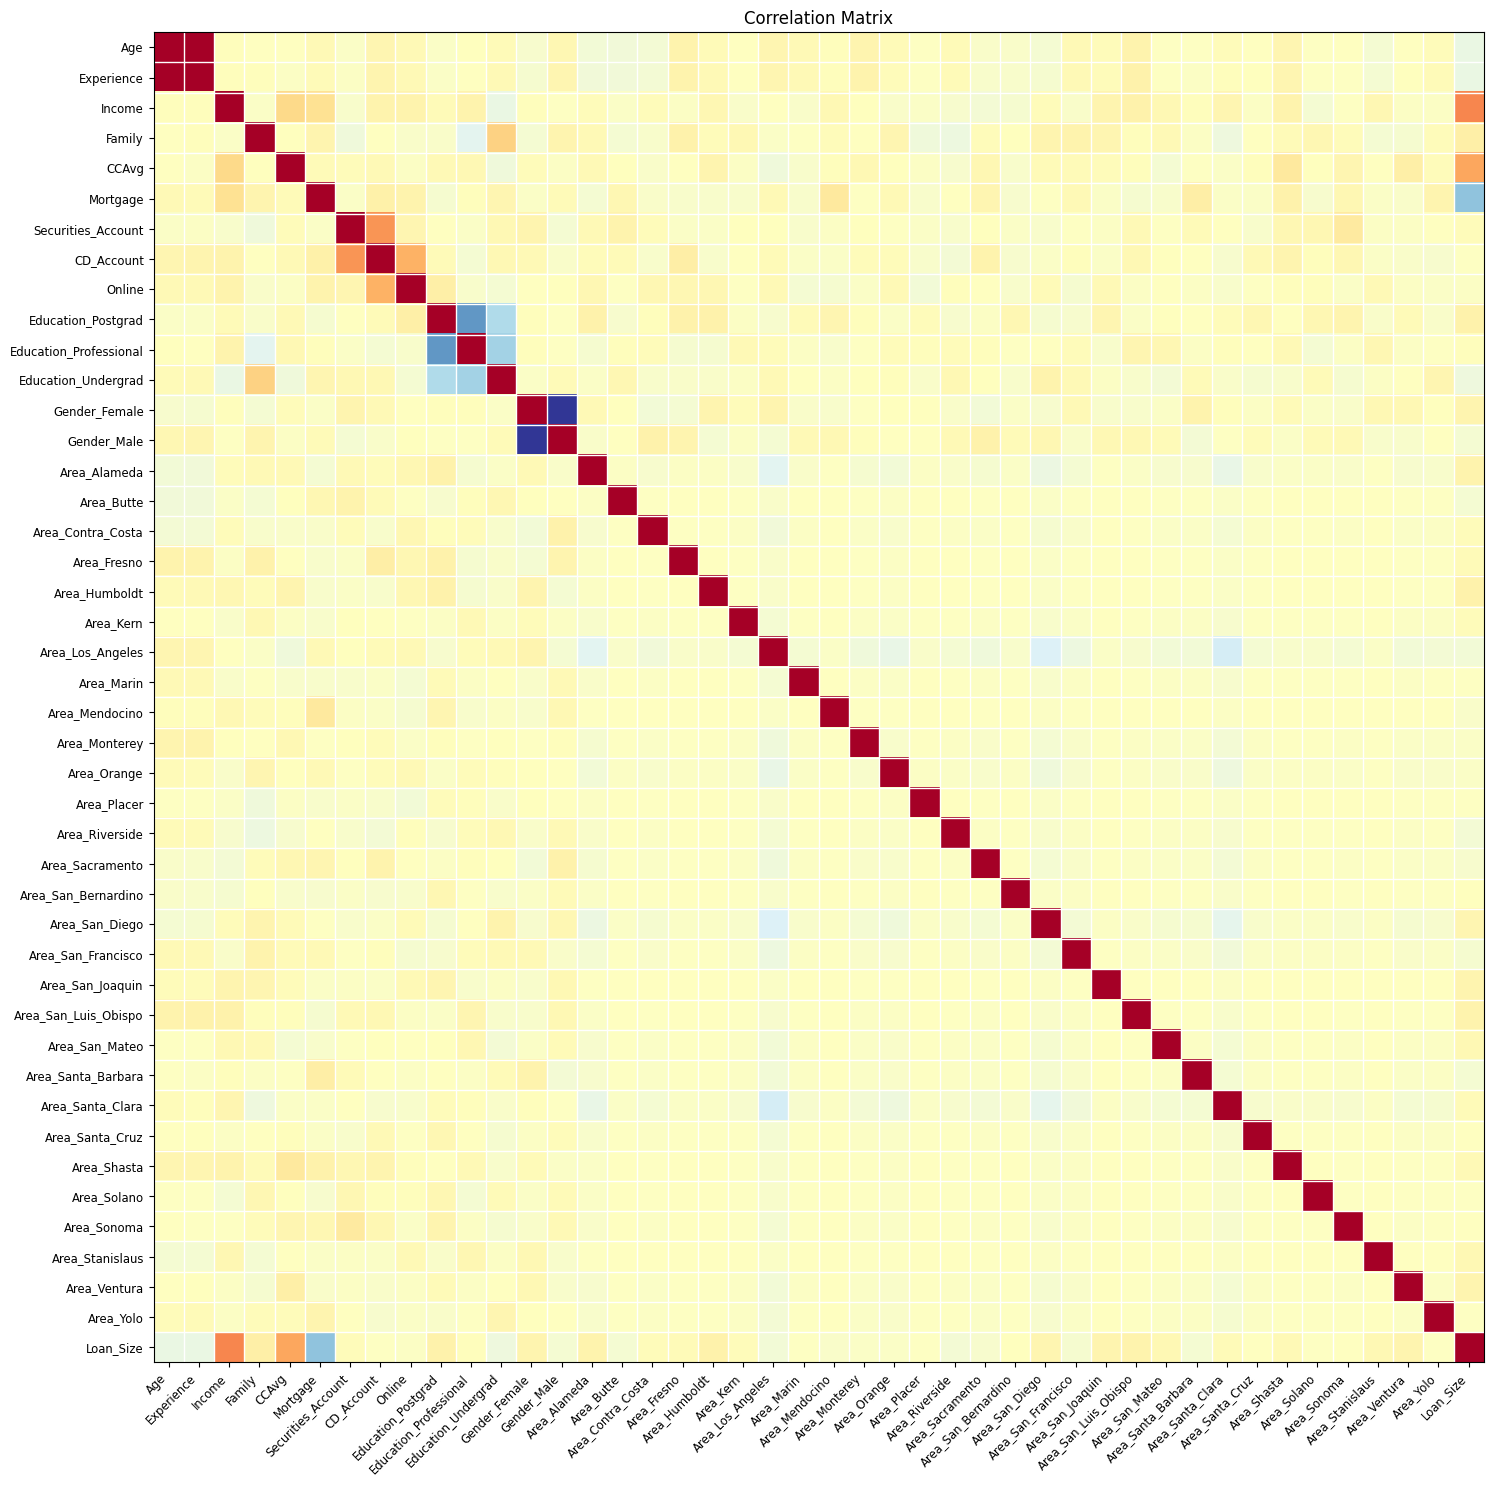

In [124]:
# The correlation heatmap
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

We can see from the correlations that it's not the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with **redundant information**. 

Our model will also have **collinearity issues**:

- Also, `Gender_Male` and `Gender_Female` are perfectly negatively correlated.

This will likely be a problem when we build a model – we will then use an OLS model summary to confirm the presence of *Multicollinearity.* 

In [126]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = df_dummies.copy()

# The dependent variable:
y_name = 'Loan_Size'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 Loan_Size ~ Age + Experience + Income + Family + CCAvg + Mortgage + Securities_Account + CD_Account + Online + Education_Postgrad + Education_Professional + Education_Undergrad + Gender_Female + Gender_Male + Area_Alameda + Area_Butte + Area_Contra_Costa + Area_Fresno + Area_Humboldt + Area_Kern + Area_Los_Angeles + Area_Marin + Area_Mendocino + Area_Monterey + Area_Orange + Area_Placer + Area_Riverside + Area_Sacramento + Area_San_Bernardino + Area_San_Diego + Area_San_Francisco + Area_San_Joaquin + Area_San_Luis_Obispo + Area_San_Mateo + Area_Santa_Barbara + Area_Santa_Clara + Area_Santa_Cruz + Area_Shasta + Area_Solano + Area_Sonoma + Area_Stanislaus + Area_Ventura + Area_Yolo


#### Fitting the model

In [127]:
# Fit the model using the model DataFrame
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.56
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.71e-115
Time:                        01:41:45   Log-Likelihood:                -1387.0
No. Observations:                 471   AIC:                             2856.
Df Residuals:                     430   BIC:                             3026.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We can see that there is a warning about strong multicollinearity. This is likely as a result of `Gender_Male` and `Gender_Female` being perfectly negatively correlated.

Further reducing these 44 features:

In [128]:
df_dummies = pd.get_dummies(df, drop_first = True)

# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size,...,Area_San_Mateo,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
0,26,2,60,2,3.0,132,0,0,0,15,...,False,False,False,False,False,False,False,False,False,False
1,26,0,83,3,3.9,0,0,0,1,30,...,False,False,False,False,False,False,False,False,True,False
2,26,0,129,3,0.7,0,0,0,0,33,...,False,False,False,False,False,False,False,False,False,False
3,26,0,132,3,6.5,0,0,0,0,40,...,False,False,False,False,False,False,False,False,False,False
4,26,2,132,2,2.4,0,0,0,0,35,...,False,False,False,False,False,False,False,False,False,False


In [129]:
df_dummies.shape

(471, 41)

We now have **41** columns instead of **44**. This gives us 40 potential independent variables that could be used to build a relationship on `Loan_Size`.

In [130]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model DataFrame
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.56
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.71e-115
Time:                        01:44:50   Log-Likelihood:                -1387.0
No. Observations:                 471   AIC:                             2856.
Df Residuals:                     430   BIC:                             3026.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We see that the **condition number** has improved, but there is still mention of strong multicollinearity in warning **\[2\]**.

We also see that the Q1 – Q3 range of coefficients and expected errors are larger than the absolute size of the coefficients themselves.

> We therefore make further selections on the variables now using their **Significance.**

## 4. Variable selection by correlation and significance

We now have 40 predictor variables to choose from, so we need a way of guiding us to **choose the best ones** to be our predictors. 

One way is to look at the **correlations** between the **`Loan Size` and each variable** in our DataFrame and select those with the **strongest correlations** – both positive and negative.

We also need to consider **how significant** those features are. 

### Calculating correlation coefficients and p-values

The code below will create a new DataFrame and store the correlation coefficients and p-values in that DataFrame for reference.

In [131]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Loan_Size'].sort_values(ascending=False)

In [132]:
corrs

Loan_Size                 1.000000
Income                    0.522566
CCAvg                     0.420913
Family                    0.097280
Area_Humboldt             0.078831
Area_San_Luis_Obispo      0.076123
Area_San_Joaquin          0.069877
Area_Ventura              0.064104
Area_San_Diego            0.054835
Area_San_Mateo            0.041827
Area_Stanislaus           0.041488
Area_Shasta               0.033688
Area_Santa_Clara          0.027144
Area_Fresno               0.025244
Securities_Account        0.022597
Area_Contra_Costa         0.021040
Area_Kern                 0.018683
Education_Professional    0.008472
Area_San_Bernardino       0.006312
Area_Sonoma              -0.002697
Area_Santa_Cruz          -0.002916
Area_Placer              -0.008249
Area_Yolo                -0.009862
CD_Account               -0.011676
Area_Solano              -0.012851
Area_Marin               -0.014348
Online                   -0.019705
Area_Orange              -0.024388
Area_Monterey       

Using [Pearson regression](http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/) from SciPy:

In [133]:
#finding the p value of each independent variable and printing it alongside the corr coefficient of each feature
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Loan_Size']

for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Loan_Size'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Income,0.522566,0.000000
Mortgage,-0.496354,0.000000
CCAvg,0.420913,0.000000
Experience,-0.131946,0.004124
Age,-0.130709,0.004492
Education_Undergrad,-0.107046,0.020143
Family,0.097280,0.034806
Area_Los_Angeles,-0.079507,0.084773
Area_Humboldt,0.078831,0.087459
Area_San_Luis_Obispo,0.076123,0.098929


Now, we've got a **sorted list of the p-values and correlation coefficients** for each of the features, when considered on their own. 

### Keeping the statistically significant features

If we were to use a logic test with a significance value of 5% (**p-value < 0.05**), we could infer that the following features are statistically significant:

* Income
* Mortgage
* CCAvg
* Experience
* Age
* Education_Undergrad
* Family

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame `X`:

In [134]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  # y_name = 'Loan_Size'

# Model building – Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]
X_data

,Income,CCAvg,Family,Education_Undergrad,Age,Experience,Mortgage
0,60,3.0,2,True,26,2,132
1,83,3.9,3,False,26,0,0
2,129,0.7,3,False,26,0,0
3,132,6.5,3,False,26,0,0
4,132,2.4,2,False,26,2,0
...,...,...,...,...,...,...,...
466,170,7.9,3,False,65,39,99
467,170,6.1,4,False,65,41,0
468,184,5.4,1,False,65,39,176
469,185,2.0,3,False,65,41,0


### Finding and removing the highly correlated features

We also need to look for predictor variable pairs which have a **high correlation with each other** to avoid **autocorrelation**.

In [135]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columns where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Income,CCAvg,Family,Education_Undergrad,Age,Experience,Mortgage
Income,1.0,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Family,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Education_Undergrad,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,1.000000,0.994515,NaN
Experience,NaN,NaN,NaN,NaN,0.994515,1.000000,NaN
Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [136]:
corr[np.abs(corr) > 0.9]

,Income,CCAvg,Family,Education_Undergrad,Age,Experience,Mortgage
Income,1.0,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Family,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Education_Undergrad,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,1.000000,0.994515,NaN
Experience,NaN,NaN,NaN,NaN,0.994515,1.000000,NaN
Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Instead of looking at the whole correlation matrix,I isolated the sections of the correlation matrix to where the off-diagonal correlations are high – **greater than 0.9 or less than 0.9**:

In [55]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off-diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off-diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Experience,Age
Age,0.994515,1.000000
Experience,1.000000,0.994515


> `Age` and `Experience` are highly correlated (perhaps unsurprising if you take a moment to think about it).

This is also visible looking back at the correlation coefficient heatmap and matrix from earlier, but a more focused / subset view of the matrix is useful to isolate the coefficients of interest.

Considering which predictor variable to drop, `Experience` is slightly **better correlated** (and lower p-value) **to the dependent variable** `Loan Size`, so **let's drop** `Age` from the feature DataFrame.

### OLS fit summary

Now let's see what the resulting OLS fit summary says:

In [137]:
# Let's take a new subset of our potential independent variables
X_remove = ['Age']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	Loan_Size ~ Income + CCAvg + Family + Education_Undergrad + Experience + Mortgage


In [138]:
# Fit the OLS model using the model DataFrame
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     251.1
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.07e-142
Time:                        01:47:42   Log-Likelihood:                -1400.3
No. Observations:                 471   AIC:                             2815.
Df Residuals:                     464   BIC:                             2844.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## 5. Variable selection by variance thresholds

Variance thresholds remove **features whose values don't change much** from observation to observation. 

The objective here is to **remove** all features that have a **variance lower than** the selected **threshold**.

In [139]:
# Separate data into independent (X) and independent (y) variables
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]
#len(X_names)
#X_data.head()

In [140]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)
#X_normalize

### Variance threshold in Scikit Learn

In [141]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [143]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
11,Gender_Male,0.249945
9,Education_Professional,0.244941
8,Online,0.238504
7,CD_Account,0.204471
17,Area_Los_Angeles,0.179002
10,Education_Undergrad,0.155877
3,Family,0.137325
32,Area_Santa_Clara,0.130968
6,Securities_Account,0.109574
26,Area_San_Diego,0.109574


The above table shows the variances of the individual columns before any threshold is applied. It allows us to **revise our initial variance threshold**


I then **extract the results** and use them to **select new columns** – which form a subset of all the columns:

In [144]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,Education_Undergrad,Gender_Male,Area_Los_Angeles,Area_Monterey,Area_Orange,Area_Sacramento,Area_San_Diego,Area_San_Francisco,Area_Santa_Clara
0,0.0,0.04878,0.000000,0.333333,0.30,0.213938,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.160839,0.666667,0.39,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.482517,0.666667,0.07,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.503497,0.666667,0.65,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.04878,0.503497,0.333333,0.24,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
X_new.shape

(471, 19)

- With a threshold of `0.03` we have gone from **40 to 19** predictors.

### Experimenting with different thresholds

I tried **a few more thresholds** to see what we end up with:

In [146]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [147]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [148]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.1)

In [149]:
selector_3.fit(X_normalize)

VarianceThreshold(threshold=0.15)

In [150]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

### Plotting the number of predictors for each threshold

Now let's graph the number of predictors by the thresholds to investigate the relationship:

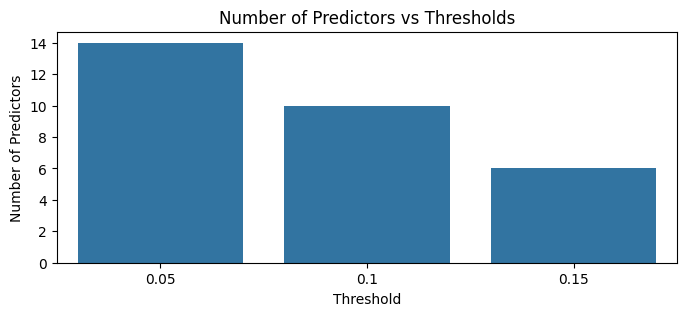

In [152]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('Number of Predictors vs Thresholds')
ax.set_ylabel('Number of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

From the above graph, as we **increase the threshold**, the **number of dimensions decreases**

In [153]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	Loan_Size ~ Age + Experience + Income + Family + CCAvg + Mortgage + Securities_Account + CD_Account + Online + Education_Professional + Education_Undergrad + Gender_Male + Area_Los_Angeles + Area_Monterey + Area_Orange + Area_Sacramento + Area_San_Diego + Area_San_Francisco + Area_Santa_Clara


In [154]:
# Fit the model using the model DataFrame
model = ols(formula=formula_str, data=df_dummies)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     81.28
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.65e-132
Time:                        01:51:05   Log-Likelihood:                -1390.6
No. Observations:                 471   AIC:                             2821.
Df Residuals:                     451   BIC:                             2904.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## 6. Training and Comparing Methods used to Reduce the dataset:

After I thinned out our DataFrame using the 2 various methods, I fit a linear regression model to compare these **2 Feature Selection Methods**:
- Variable Selection by Correlation and Significance
- Variable Selection by Variance Thresholding

### Splitting the datasets

First, I trained and tested the  data:

In [155]:
# Train-test split the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [156]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [157]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

### Fitting the models

In [159]:
# Instantiate the models
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [160]:
# Fit the models
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

### Assessing the Accuracy of the Models:

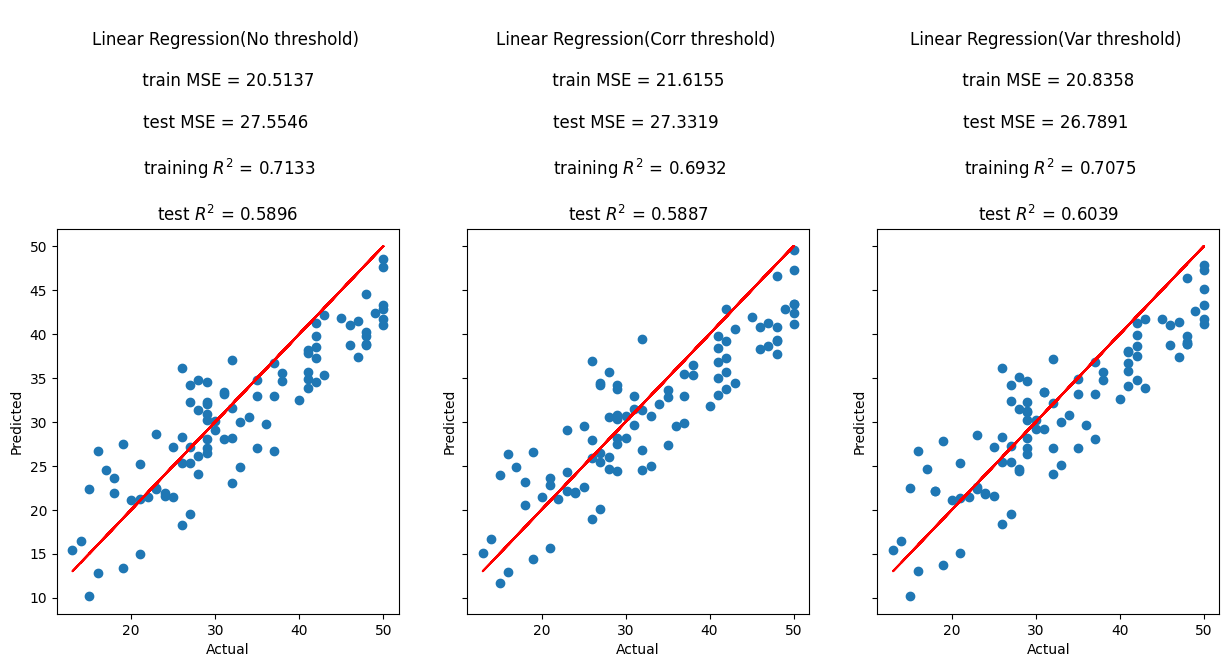

In [169]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)


train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold – linear regression with all predictive variables
# Corr threshold – linear regression with correlation-thresholded predictive variables
# Var threshold – linear regression with variance-thresholded predictive variables


# Looping through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"\nLinear Regression({title[i]}) \n\n train MSE = {train_mse} \n " + \
                f"\ntest MSE = {test_mse} \n\n training $R^{2}$ = {train_r2} \n " + \
                f"\ntest $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

print(" ")

From the results, I managed to **slightly improve our model by using fewer predictors**.  

> It's interesting to note that although our **training MSE** for the **"No threshold" model** was the **lowest at training**, it increases to the **highest** of the three models **at testing**. 

This is a sign that the model was overfitting the data, and the **other two models** have a **better capacity for generalising** to new data.